In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, random, time

import warnings
warnings.filterwarnings('ignore')

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/1_reformat/latest/phase_III/behavior/divide_into_two


### Reformat LPR behavioral data

In [6]:
########## mac
complete_input_file_path= '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/behavior/LPR/tall/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23.csv'

########## constance

df_behav = pd.read_csv(complete_input_file_path, header = 0)

df_behav = df_behav.rename({'variable': 'timepoint'}, axis=1)

display(len(np.unique(df_behav['chemical.id'])))
display(df_behav.head())

215

,chemical.id,bottle.id,conc,plate.id,well,variable,value
0,234,NTP DNT 91-A1,0.0,14389,H01,t0,17.223000
1,234,NTP DNT 91-A1,0.0,14389,H02,t0,12.876000
2,234,NTP DNT 91-A1,0.0,14389,H03,t0,24.156000
3,234,NTP DNT 91-A1,0.0,14389,H04,t0,31.421999
4,234,NTP DNT 91-A1,0.0,14389,H05,t0,36.917999


In [7]:
# Keep only relevant columns
columns_to_keep = ['chemical.id', 'conc', 'plate.id', 'well', 'variable', 'value']
df_select = df_behav.loc[:,columns_to_keep]
df_select.head()

,chemical.id,conc,plate.id,well,variable,value
0,234,0.0,14389,H01,t0,17.223000
1,234,0.0,14389,H02,t0,12.876000
2,234,0.0,14389,H03,t0,24.156000
3,234,0.0,14389,H04,t0,31.421999
4,234,0.0,14389,H05,t0,36.917999


### Transpose time points

In [20]:
start_time = time.time()

df_per_chemical_w_240_timepoints = pd.DataFrame()
df_per_chemical_w_15_timepoints = pd.DataFrame()
    
len_variable = []
len_unique_variable = []
    
full_devel = "full"
#full_devel = "devel"

chemical_id_from_here = np.unique(df_behav['chemical.id'])

if (full_devel == "devel"):
    choose_this_number = min(len(chemical_id_from_here), 1)
    randomly_chosen = random.sample(set(chemical_id_from_here), choose_this_number)
    chemical_id_from_here = []
    for i in range(len(randomly_chosen)):
        chemical_id_from_here.append(randomly_chosen[i])

total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0

for chemical_index in chemical_id_from_here:
    print("chemical_index:" + str(chemical_index))
    df_per_chemical = df_select.loc[df_behav['chemical.id'] == chemical_index,:]
    #print("len(df_per_chemical):" + str(len(df_per_chemical))) # for chemical.id=234, 69120

    if (len(np.unique(df_per_chemical['variable'])) == 240):
        df_per_chemical_w_240_timepoints = pd.concat([df_per_chemical_w_240_timepoints, df_per_chemical])
    else:
        df_per_chemical_w_15_timepoints  = pd.concat([df_per_chemical_w_15_timepoints, df_per_chemical])
    len_variable.append(len(df_per_chemical['variable']))
    len_unique_variable.append(len(np.unique(df_per_chemical['variable'])))
    
    number_of_chemicals_processed += 1
    print_this = str(number_of_chemicals_processed) + " chemicals processed out of " + str(total_number_of_chemicals_to_processed)
    print(print_this)


end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# took 2.5 minutes for 215 chemicals

chemical_index:234
1 chemicals processed out of 215
chemical_index:275
2 chemicals processed out of 215
chemical_index:280
3 chemicals processed out of 215
chemical_index:385
4 chemicals processed out of 215
chemical_index:397
5 chemicals processed out of 215
chemical_index:443
6 chemicals processed out of 215
chemical_index:467
7 chemicals processed out of 215
chemical_index:505
8 chemicals processed out of 215
chemical_index:588
9 chemicals processed out of 215
chemical_index:595
10 chemicals processed out of 215
chemical_index:622
11 chemicals processed out of 215
chemical_index:660
12 chemicals processed out of 215
chemical_index:692
13 chemicals processed out of 215
chemical_index:699
14 chemicals processed out of 215
chemical_index:725
15 chemicals processed out of 215
chemical_index:726
16 chemicals processed out of 215
chemical_index:947
17 chemicals processed out of 215
chemical_index:949
18 chemicals processed out of 215
chemical_index:955
19 chemicals processed out of 215
ch

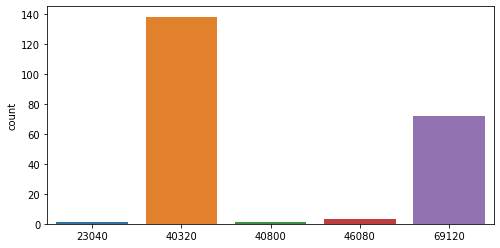

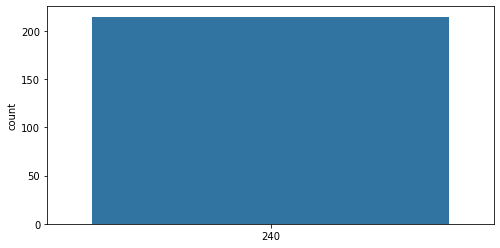

In [21]:
ds = pd.Series({"Column": len_variable})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)
plt.show()


ds = pd.Series({"Column": len_unique_variable})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)
plt.show()

In [22]:
display(df_per_chemical_w_240_timepoints)
display(df_per_chemical_w_15_timepoints)

,chemical.id,conc,plate.id,well,variable,value
0,234,0.0,14389,H01,t0,17.223000
1,234,0.0,14389,H02,t0,12.876000
2,234,0.0,14389,H03,t0,24.156000
3,234,0.0,14389,H04,t0,31.421999
4,234,0.0,14389,H05,t0,36.917999
...,...,...,...,...,...,...
8646235,4457,100.0,22097,D01,t239,0.000000
8646236,4457,100.0,22097,E01,t239,0.000000
8646237,4457,100.0,22097,F01,t239,1.052000
8646238,4457,100.0,22097,G01,t239,0.000000


""


In [23]:
reformatted_data_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_w_240_timepoints.csv"
df_per_chemical_w_240_timepoints.to_csv(reformatted_data_filename,index=False)

In [24]:
reformatted_data_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_w_15_timepoints.csv"
df_per_chemical_w_15_timepoints.to_csv(reformatted_data_filename,index=False)

In [27]:
display(len(np.unique(df_per_chemical_w_240_timepoints['chemical.id'])))

#display(len(np.unique(df_per_chemical_w_15_timepoints['chemical.id'])))

215